In [2]:
import numpy as np
from progressbar import ProgressBar
from algorithm.algorithms import * 
from bandit_process.arm_generator import *
from matplotlib import pyplot as plt
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
import os
import math
import seaborn as sns
from bandit_process.new_arms import *
sns.set(style='whitegrid', font_scale=1.75)

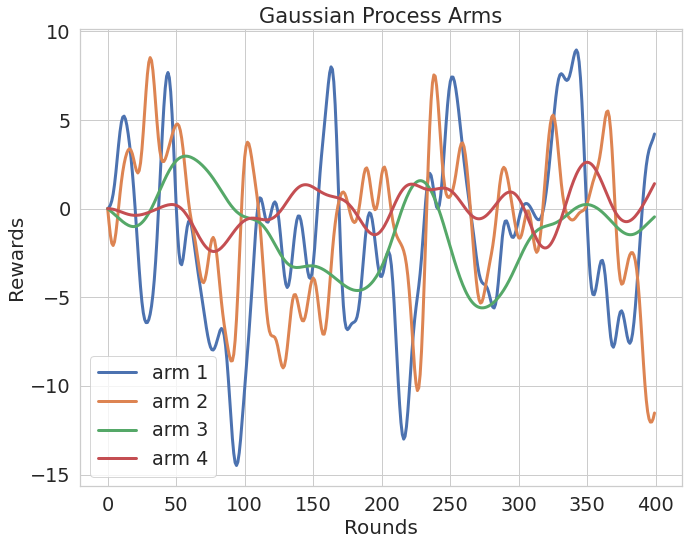

In [5]:
arm1=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=400)
arm2=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=400)
arm3=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=400)
arm4=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=400)

plt.figure(figsize=(10, 8))
plt.plot(arm1.arm_path,label='arm 1',linewidth=3)
plt.plot(arm2.arm_path,label='arm 2',linewidth=3)
plt.plot(arm3.arm_path,label='arm 3',linewidth=3)
plt.plot(arm4.arm_path,label='arm 4',linewidth=3)
plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Rewards',fontsize=20)
plt.title('Gaussian Process Arms')
plt.tight_layout()
plt.legend()

#plt.savefig('Gaussian Process Arms.png')

two arms

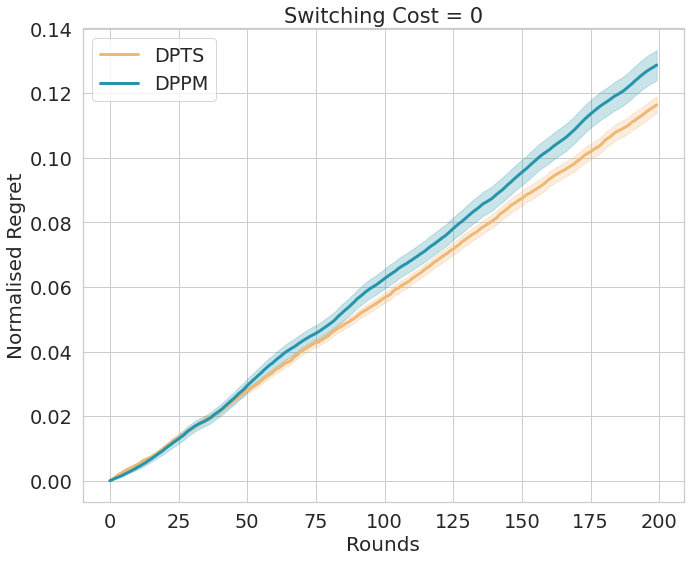

In [10]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/new_regret_DPTS_cost0.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/new_regret_DPPM_cost0.csv'), delimiter=',')


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 0')
plt.legend()

4 arms

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


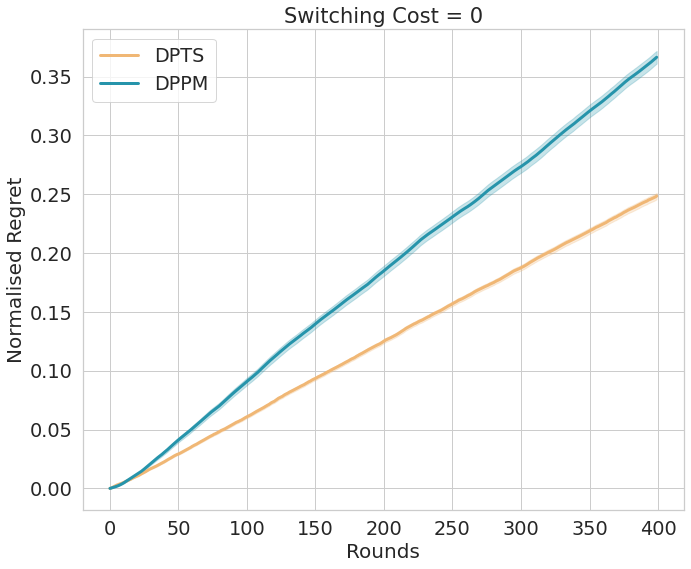

In [3]:
N = 250
T = 400

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPTS_cost0.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPPM_cost0.csv'), delimiter=',')


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 0')
plt.legend()
#plt.savefig('4arms_SC0.png')

In [4]:
choice_DPTS = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPTS_cost0.csv'), delimiter=',')
print('The result of DPTS: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPTS==2)+np.mean(choice_DPTS==3)}')
    
choice_DPPM = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPPM_cost0.csv'), delimiter=',')
print('The result of DPPM: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPPM==2)+np.mean(choice_DPPM==3)}')

The result of DPTS: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.37678999999999996
The result of DPPM: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.62495


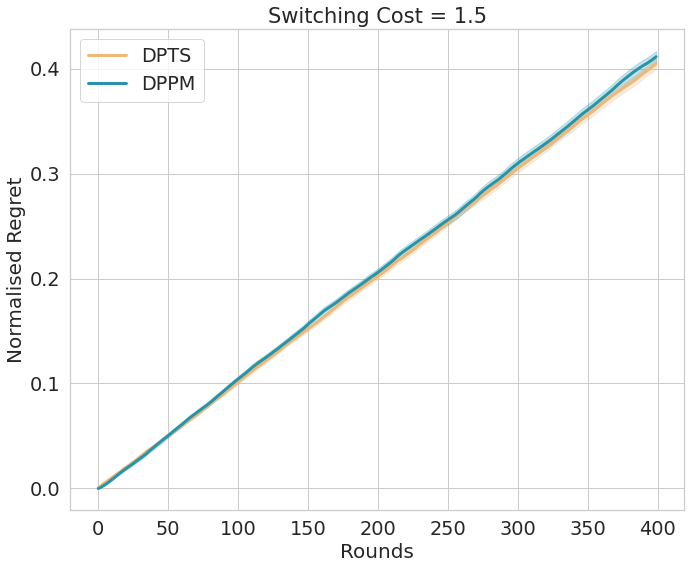

In [5]:
N = 250
T = 400

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPTS_cost1.5.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPPM_cost1.5.csv'), delimiter=',')


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 1.5')
plt.legend()
#plt.savefig('4arms_SC1.5.png')

In [6]:
choice_DPTS = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPTS_cost1.5.csv'), delimiter=',')
print('The result of DPTS: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPTS==2)+np.mean(choice_DPTS==3)}')
    
choice_DPPM = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPPM_cost1.5.csv'), delimiter=',')
print('The result of DPPM: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPPM==2)+np.mean(choice_DPPM==3)}')

The result of DPTS: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.37433
The result of DPPM: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.6279699999999999


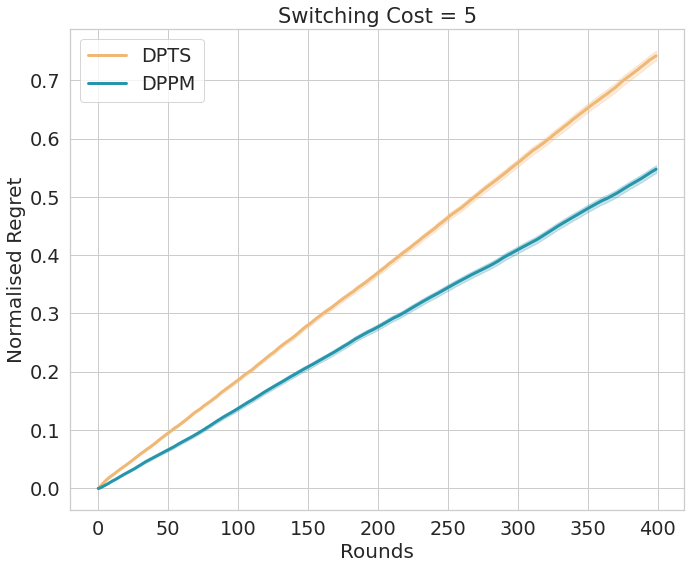

In [7]:
N = 250
T = 400

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPTS_cost5.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPPM_cost5.csv'), delimiter=',')


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 5')
plt.legend()
#plt.savefig('4arms_SC5.png')

In [8]:
choice_DPTS = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPTS_cost5.csv'), delimiter=',')
print('The result of DPTS: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPTS==2)+np.mean(choice_DPTS==3)}')
    
choice_DPPM = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPPM_cost5.csv'), delimiter=',')
print('The result of DPPM: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPPM==2)+np.mean(choice_DPPM==3)}')

The result of DPTS: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.37534
The result of DPPM: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.6962600000000001


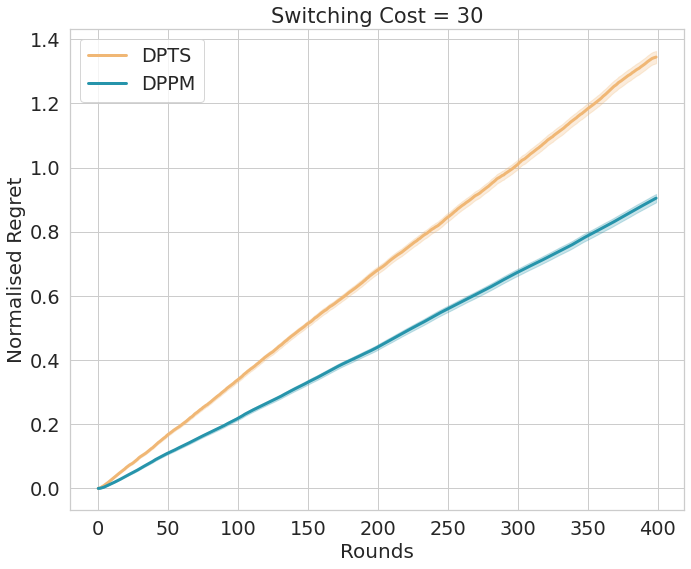

In [9]:
N = 250
T = 400

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPTS_cost30.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPPM_cost30.csv'), delimiter=',')


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 30')
plt.legend()
#plt.savefig('4arms_SC30.png')

In [10]:
choice_DPTS = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPTS_cost30.csv'), delimiter=',')
print('The result of DPTS: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPTS==2)+np.mean(choice_DPTS==3)}')
    
choice_DPPM = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPPM_cost30.csv'), delimiter=',')
print('The result of DPPM: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPPM==2)+np.mean(choice_DPPM==3)}')

The result of DPTS: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.34085
The result of DPPM: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.7336


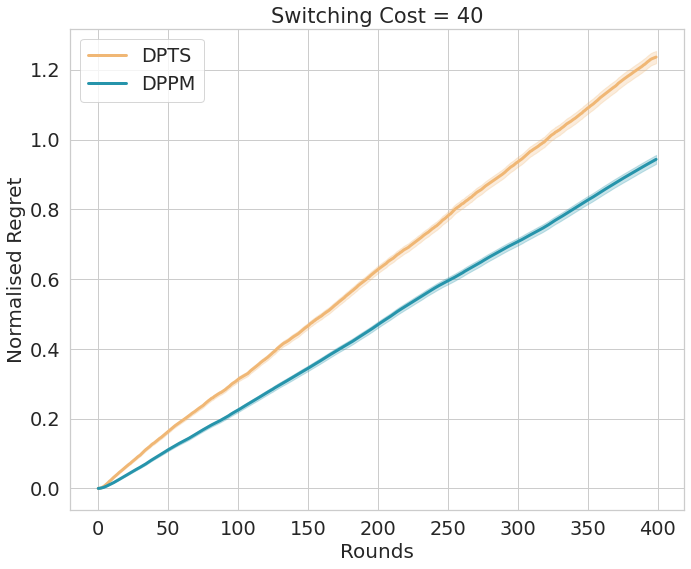

In [11]:
N = 250
T = 400

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPTS_cost40.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPPM_cost40.csv'), delimiter=',')


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 40')
plt.legend()
#plt.savefig('4arms_SC40.png')

In [12]:
choice_DPTS = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPTS_cost40.csv'), delimiter=',')
print('The result of DPTS: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPTS==2)+np.mean(choice_DPTS==3)}')
    
choice_DPPM = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPPM_cost40.csv'), delimiter=',')
print('The result of DPPM: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPPM==2)+np.mean(choice_DPPM==3)}')

The result of DPTS: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.33433
The result of DPPM: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.58075


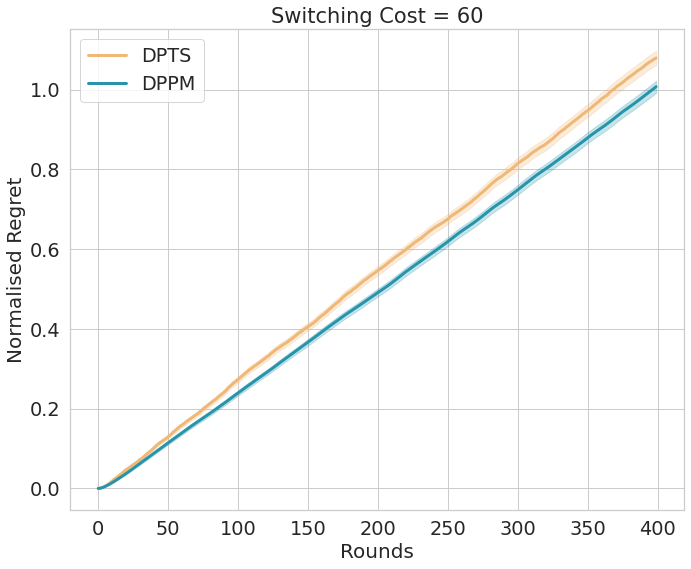

In [13]:
N = 250
T = 400

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPTS_cost60.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPPM_cost60.csv'), delimiter=',')


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 60')
plt.legend()
#plt.savefig('4arms_SC60.png')

In [14]:
choice_DPTS = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPTS_cost60.csv'), delimiter=',')
print('The result of DPTS: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPTS==2)+np.mean(choice_DPTS==3)}')
    
choice_DPPM = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPPM_cost60.csv'), delimiter=',')
print('The result of DPPM: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPPM==2)+np.mean(choice_DPPM==3)}')

The result of DPTS: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.30547
The result of DPPM: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.544


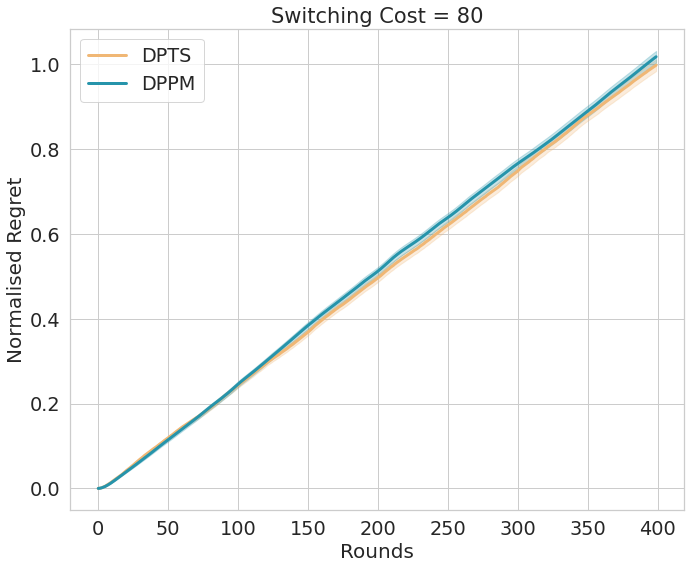

In [15]:
N = 250
T = 400

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPTS_cost80.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPPM_cost80.csv'), delimiter=',')


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 80')
plt.legend()
#plt.savefig('4arms_SC80.png')

In [28]:
choice_DPTS = np.genfromtxt(os.path.join(os.getcwd(),'4arms_choice_DPTS_cost80.csv'), delimiter=',')
print('The result of DPTS: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPTS==2)+np.mean(choice_DPTS==3)}')
    
choice_DPPM = np.genfromtxt(os.path.join(os.getcwd(),'4arms_choice_DPPM_cost80.csv'), delimiter=',')
print('The result of DPPM: ')
for C in [0]:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPPM==2)+np.mean(choice_DPPM==3)}')

The result of DPTS: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.46996
The result of DPPM: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.5
